# Felipe Castillo
# Neural Network
# Data Mining
# 05/28/2022

In [1]:
import numpy as np
import sys
import seaborn as sns
from keras.datasets import mnist
from keras import backend as k
from keras.models import Sequential
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from keras.layers.convolutional import Conv2D,MaxPooling2D
from tensorflow.keras.layers import Flatten,Dense,Dropout
from matplotlib import pyplot as plt
from keras.utils import np_utils

In [11]:
#keras-2.9.0-py2.py3-none-any.whl
# tensorflow-2.9.1
#!{sys.executable} -m pip install tensorflow

# 1.Load the MNIST data set.

In [2]:
(data_train,target_train) , (data_test, target_test) = mnist.load_data()

# 2. Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

In [3]:
#printing labels training set 
for i in range(5):
    print(target_train[i])

5
0
4
1
9


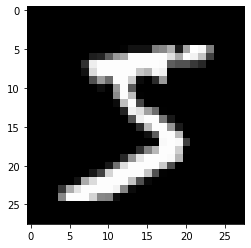

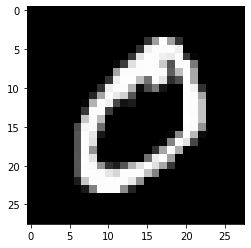

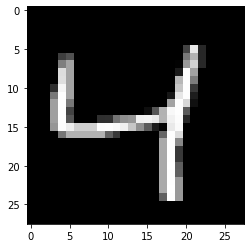

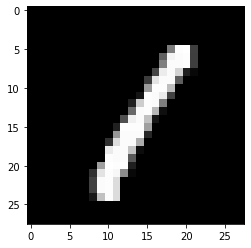

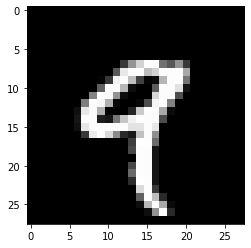

In [4]:
#printing images training set
#first 5
for i in range(5):
    #getting index of data train converting to image 
    plt.imshow(data_train[i], cmap= plt.get_cmap('gray'))
    plt.show()

The first 5 labels and the images are identical.

# 3. Build and train a Keras CNN classifier on the MNIST training set.

In [5]:
#defing parameters used in multiple steps
channels = 1
height = 28
width = 28

In [6]:
#reshaping
data_train = data_train.reshape(data_train.shape[0],height, width,channels)
data_test = data_test.reshape(data_test.shape[0],height, width,channels)



In [7]:
#rescaling pixels intensity between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

In [8]:
#one hot Encoding targets
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)

number_of_classes = target_test.shape[1]

In [9]:
#instantiating neural network
model = Sequential()

In [10]:
#adding convolutional layer with 28 filters, 3X3 window, and relu as activation function
model.add(Conv2D(filters=28,
                kernel_size=(3,3),
                input_shape=(width,height,channels),
                activation='relu'))

In [11]:
#add max pooling layer with a 2X2 window
model.add(MaxPooling2D(pool_size=(2,2)))


In [12]:
#Add drop out layer
model.add(Dropout(0.5))

In [13]:
#Add layer to flatten input
model.add(Flatten())

In [14]:
#Add connected layer of 128 units with relu activiation funciton
model.add(Dense(128, activation='relu'))

In [15]:
#Add drop out layer
model.add(Dropout(0.5))

In [16]:
#Add connected layer of with a software activation function
model.add(Dense(number_of_classes,activation='softmax'))

In [17]:
#compile neural network 
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [18]:
#train neural network 
model.fit(features_train,target_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 21s 11ms/step - loss: 0.2877 - accuracy: 0.9127
Epoch 2/2
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1487 - accuracy: 0.9560


In [19]:
#Evaluate model
results = model.evaluate(features_test,target_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0693 - accuracy: 0.9791


In [20]:
results

[0.06925839185714722, 0.9790999889373779]

# 4.Report the test accuracy of your model.

In [21]:
#Get model accuracy
print("Accuracy: " +str(results[1]))

Accuracy: 0.9790999889373779


In [22]:
predicted = model.predict(features_test)

313/313 [==============================] - 1s 3ms/step


# 5. Display a confusion matrix on the test set classifications.

In [23]:
#Change values to non one hot encoding 
results = confusion_matrix(target_test.argmax(axis=1),predicted.argmax(axis=1))
#results

<AxesSubplot:>

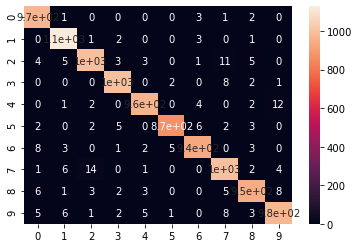

In [24]:
#Outputting confusion matrix heatmap 
sns.heatmap(results, annot=True)

# 6. Summarize your results.

The accuracy of the model is 97 percent. Meaning the accuracy of this model is high. The confusion matrix seems to show this as well. Most of the labels were able to accurately predict the numbers and the instances of those numbers. For example, when there was a 9, it was able to predict that it was a 9. Although most of the numbers fell into this category, there was some interesting information that came out of it. It seems like the model confused some instances. For example, 7 at times was confused with 9. Depending on how the image looks, this could easily be mistaken. The truth can be said about other numbers in the confusion matrix. But overall, the model performed well and was 97 percent accurate in its prediction.